In [1]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3, 3), activation='relu')

In [2]:
keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu', padding='same')

In [3]:
keras.layers.Conv2D(10, kernel_size = (3, 3), activation='relu', padding='same', strides=1)

In [4]:
keras.layers.MaxPooling2D(2)

In [5]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

---

In [13]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                     test_size = 0.2,
                                                                     random_state=42)

In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                             padding = 'same', input_shape=(28, 28, 1)))

In [15]:
model.add(keras.layers.MaxPooling2D(2))

In [16]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',
                             padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [17]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                   validation_data = (val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.5394 - accuracy: 0.8061 - val_loss: 0.3397 - val_accuracy: 0.8754
Epoch 2/20
1500/1500 [==============================] - 74s 49ms/step - loss: 0.3598 - accuracy: 0.8717 - val_loss: 0.2911 - val_accuracy: 0.8878
Epoch 3/20
1500/1500 [==============================] - 74s 49ms/step - loss: 0.3091 - accuracy: 0.8892 - val_loss: 0.2659 - val_accuracy: 0.9032
Epoch 4/20
1500/1500 [==============================] - 74s 50ms/step - loss: 0.2755 - accuracy: 0.8998 - val_loss: 0.2503 - val_accuracy: 0.9063
Epoch 5/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2532 - accuracy: 0.9070 - val_loss: 0.2376 - val_accuracy: 0.9133
Epoch 6/20
1500/1500 [==============================] - 75s 50ms/step - loss: 0.2341 - accuracy: 0.9146 - val_loss: 0.2344 - val_accuracy: 0.9138
Epoch 7/20
1500/1500 [==============================] - 80s 53ms/step - loss: 0.2146 - accuracy: 0.9217 - val_loss: 0.2233 -

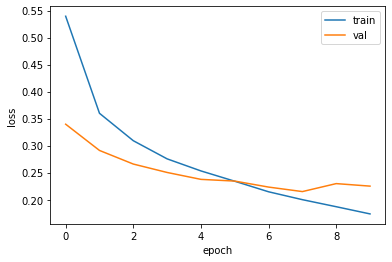

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [25]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 15ms/step - loss: 0.2150 - accuracy: 0.9226


[0.2149752378463745, 0.9225833415985107]

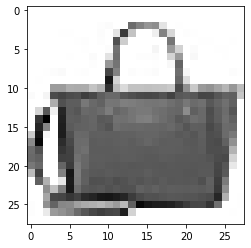

In [26]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [27]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[4.8134603e-20 4.5554965e-30 2.7379591e-24 3.6709030e-23 4.5947593e-25
  4.0025610e-26 1.2934006e-22 7.7892870e-23 1.0000000e+00 4.1895507e-24]]


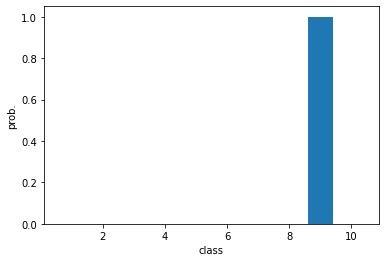

In [28]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [29]:
classes=['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [30]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [31]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [32]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.2441 - accuracy: 0.9153


[0.24409309029579163, 0.9153000116348267]

----

In [35]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [38]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [40]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.00796377 0.2328387


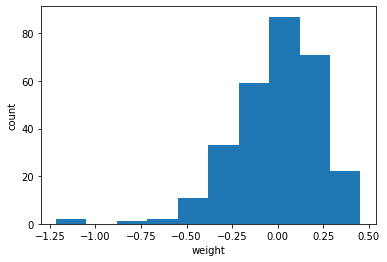

In [44]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

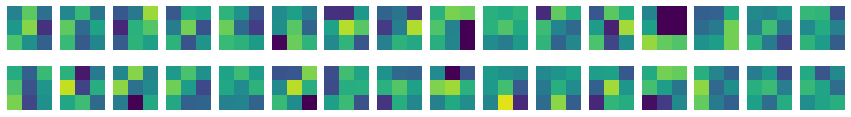

In [46]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j],
                        vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [48]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, 
                                          activation='relu', padding='same',
                                         input_shape=(28, 28, 1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [50]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0060859304 0.07840912


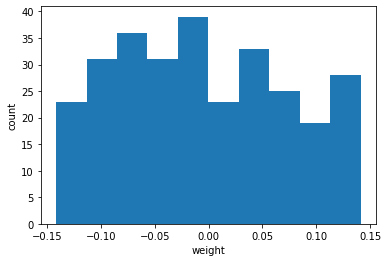

In [51]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

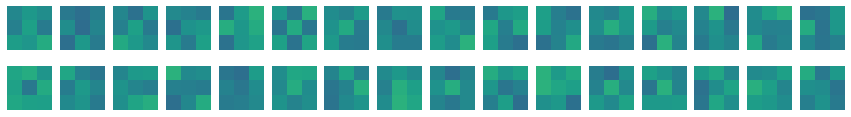

In [53]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j],
                        vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

---

In [72]:
# 함수형 API

dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [73]:
hidden = dense1(inputs)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [74]:
outputs = dense2(hidden)

In [80]:
model = Model(inputs, outputs)

NameError: name 'Model' is not defined

In [78]:
inputs = keras.Input(shape=(784,))

In [79]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

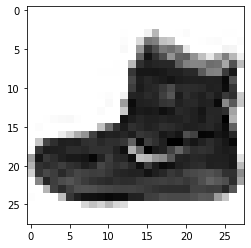

In [81]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [82]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [84]:
print(feature_maps.shape)

(1, 28, 28, 32)


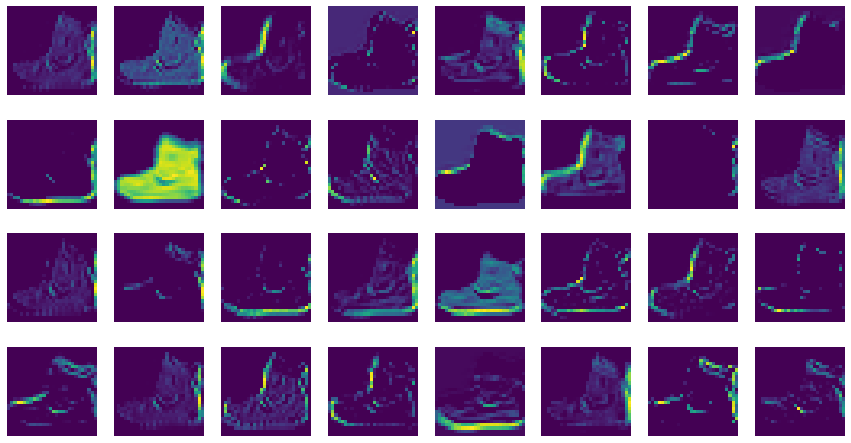

In [86]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [87]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [88]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [89]:
print(feature_maps.shape)

(1, 14, 14, 64)


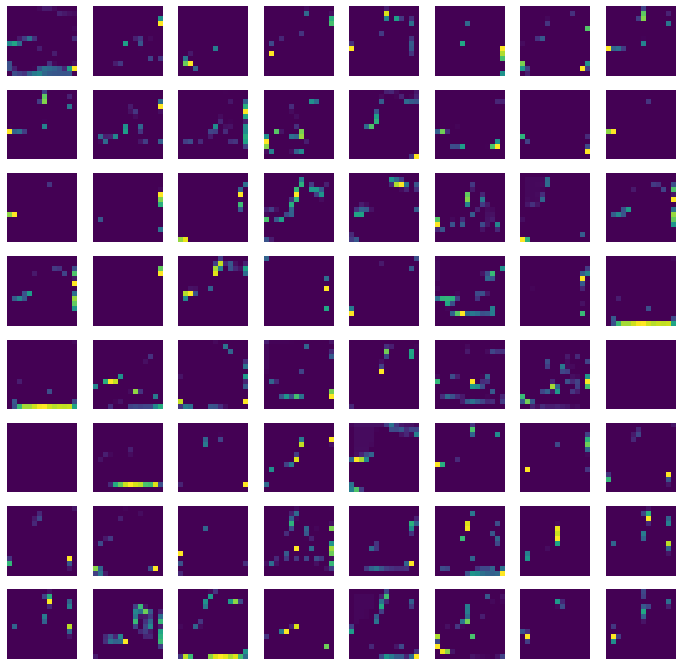

In [90]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*7 + j])
        axs[i, j].axis('off')
plt.show()